Nobel Prize

How many people did get more than 1 Nobel Prize?

In [3]:
import requests
import json

response = requests.get('https://api.nobelprize.org/v1/laureate.json')
data = response.json()


laureate_prizes = {}
for laureate in data['laureates']:

    for prize in laureate['prizes']:

        if laureate['id'] in laureate_prizes:

                laureate_prizes[laureate['id']] += 1

        else:

                laureate_prizes[laureate['id']] = 1



count = 0

for num_prizes in laureate_prizes.values():

    if num_prizes > 1:

        count += 1

       

print(f"{count} laureates have won more than one Nobel Prize.")

7 laureates have won more than one Nobel Prize.


How many people did get more than 2 Nobel Prizes?

In [4]:
count = 0

for num_prizes in laureate_prizes.values():

    if num_prizes > 2:

        count += 1




print(f"{count} laureates have won more than two Nobel Prize.")    

1 laureates have won more than two Nobel Prize.


What is the field women got most Nobel Prizes?

In [1]:
import requests

female_url = "http://api.nobelprize.org/2.1/laureates?limit=1000&gender=female"

# Send a GET request to the API endpoint
response = requests.get(female_url)

# Convert the JSON response to a Python object
data = response.json()


# Count the number of prizes in each field
fields = {}
for laureate in data["laureates"]:
    field = laureate["nobelPrizes"][0]['category']['en']
    fields[field] = fields.get(field, 0) + 1

# Determine the field with the most prizes for women
most_prizes_field = max(fields, key=fields.get)

# Print the result
print(f"Fields with Nobel Prize winning women: {fields}")
print(f"Field with the most Nobel Prizes for women: {most_prizes_field}")

Fields with Nobel Prize winning women: {'Chemistry': 7, 'Literature': 17, 'Peace': 18, 'Physics': 4, 'Physiology or Medicine': 12, 'Economic Sciences': 2}
Field with the most Nobel Prizes for women: Peace


What is the field men got most Nobel Prizes?

In [15]:
import requests

male_url="http://api.nobelprize.org/2.1/laureates?limit=1000&gender=male"

# Send a GET request to the API endpoint
response = requests.get(male_url)

# Convert the JSON response to a Python object
data = response.json()


# Count the number of prizes in each field
fields = {}
for laureate in data["laureates"]:
    field = laureate["nobelPrizes"][0]['category']['en']
    fields[field] = fields.get(field, 0) + 1

# Determine the field with the most prizes for men
most_prizes_field = max(fields, key=fields.get)

# Print the result
print(f"Fields with Nobel Prize winning men: {fields}")
print(f"Field with the most Nobel Prizes for men: {most_prizes_field}")

Fields with Nobel Prize winning men: {'Economic Sciences': 90, 'Physics': 217, 'Chemistry': 180, 'Literature': 102, 'Peace': 92, 'Physiology or Medicine': 213}
Field with the most Nobel Prizes for men: Physics


What is the distribution of the gender for Nobel Prizes

In [36]:
import requests
import json
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd

#Number of female laureates
female_url = "http://api.nobelprize.org/2.1/laureates?limit=100&gender=female"
female_request = requests.get(female_url)
female_response = female_request.json()

female_winners= len(female_response['laureates'])

#Number of male laureates
male_url="http://api.nobelprize.org/2.1/laureates?limit=1000&gender=male"
male_request = requests.get(male_url)
male_response = male_request.json()

male_winners= len(male_response['laureates'])

#Number of other laureates
other_url="http://api.nobelprize.org/2.1/laureates?limit=100&gender=other"
other_request = requests.get(other_url)
other_response = other_request.json()

other_winners= len(other_response['laureates'])


print('Number of Nobel Prize winners by gender:')
print('Male winners: {}'.format(male_winners))
print('Female winners: {}'.format(female_winners))
print('Other winners: {}'.format(other_winners))


Number of Nobel Prize winners by gender:
Male winners: 894
Female winners: 60
Other winners: 27


Visualisation of Data distribution

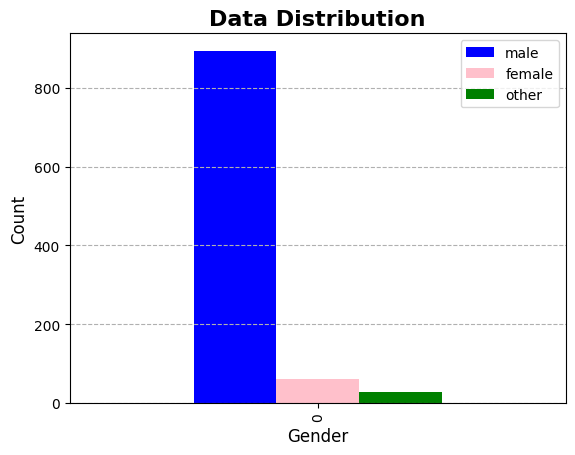

In [34]:
#Data distribution
data = {'male': [male_winners], 'female': [female_winners], 'other': [other_winners]}
df = pd.DataFrame(data)

df.plot(kind='bar', color=['blue', 'pink', 'green'])
plt.title('Data Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()